## 고유 diamond 구하기

In [ ]:
import pickle
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
with open('2021_10_31.pkl', 'rb') as f:
  datas = pickle.load(f)

In [ ]:
datas[0].keys()

dict_keys(['Date', 'WhoUploaded', 'Original_keynote', 'New_chord', 'Country', 'Artist', 'Chord_rates_with_space', 'Space_num', 'Songname', 'Genre', 'BPM'])

In [ ]:
# 4 chords
out = []
for data in datas:
  if 'ost' in data['Genre']:
    chord = data['New_chord']
  else:
    continue
  chord = data['New_chord']
  chord1 = chord[:-3]
  chord2 = chord[1:-2]
  chord3 = chord[2:-1]
  chord4 = chord[3:]
  for c1, c2, c3, c4 in zip(chord1, chord2, chord3, chord4):
    out.append('_'.join([c1,c2,c3,c4]))

In [ ]:
C_out = Counter(out)
sortedC = sorted(C_out.items(), key=lambda x:x[1], reverse=True)
x = [i[0] for i in sortedC]
y = [i[1] for i in sortedC]
print('코드 개수: ', len(C_out))

코드 개수:  5225


In [ ]:
diamonds = [] # 
def diamondappend(chord, chordnum):
  global diamonds
  for n, (dia, num) in enumerate(diamonds):
    if dia.find(chord) != -1:
      diamonds[n][1] += chordnum
      return True # 있는 diamond 중 하나다!
  diamonds.append([chord+'_'+chord, chordnum])
  return False # 없는 diamond라 추가했다.

for chord, chordnum in tqdm(C_out.items()):
  diamondappend(chord, chordnum)

100%|██████████| 5225/5225 [00:01<00:00, 2612.52it/s]


In [ ]:
print('diamond 종류:', len(diamonds))
sorted_dia = sorted(diamonds, key=lambda x:x[1], reverse=True)

diamond 종류: 3249


In [ ]:
sorted_dia[:20]

[['C_G_Am_F_C_G_Am_F', 691],
 ['G_C_Am_Dm_G_C_Am_Dm', 227],
 ['F_G_C_G_F_G_C_G', 225],
 ['G_Am_G_C_G_Am_G_C', 222],
 ['F_C_E_Am_F_C_E_Am', 193],
 ['C_F_C_G_C_F_C_G', 182],
 ['F_G_Am_Em_F_G_Am_Em', 180],
 ['F_C_Am_C_F_C_Am_C', 179],
 ['G_C_Am_F_G_C_Am_F', 165],
 ['Dm_G_C_F_Dm_G_C_F', 164],
 ['F_G_Am_G_F_G_Am_G', 146],
 ['C_F_G_Am_C_F_G_Am', 142],
 ['F_C_F_C_F_C_F_C', 135],
 ['Dm_G_F_C_Dm_G_F_C', 132],
 ['C_G_C_G_C_G_C_G', 129],
 ['G_C_Em_F_G_C_Em_F', 125],
 ['Dm_G_C_G_Dm_G_C_G', 113],
 ['Em_F_C_Am_Em_F_C_Am', 113],
 ['G_F_C_Am_G_F_C_Am', 109],
 ['C_Dm_C_F_C_Dm_C_F', 105]]

In [ ]:
new_dias = [['_'.join(chord.split('_')[:4]), chordnum] for chord, chordnum in sorted_dia]
x = [chord for chord, chordnum in new_dias]
y = [chordnum for chord, chordnum in new_dias]

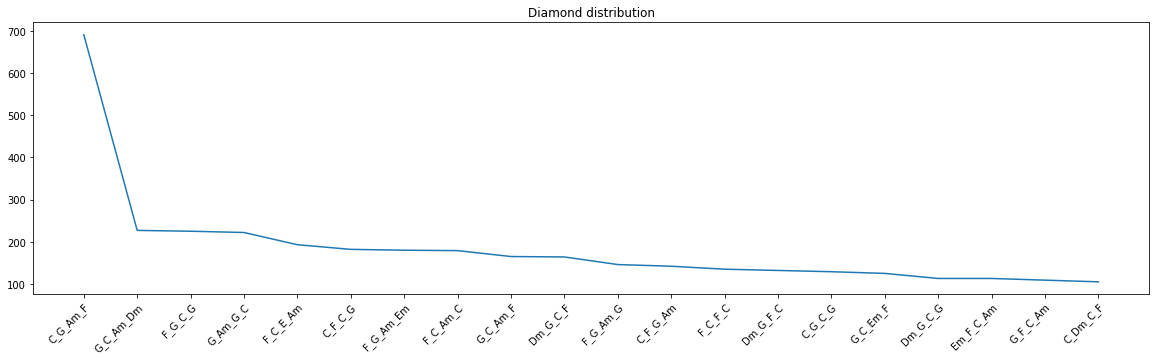

In [ ]:
fig, axe = plt.subplots(figsize=(20,5))
# plt.yscale('log')
plt.title('Diamond distribution')
plt.plot(x[:20], y[:20])
plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
plt.show()

## 노래별로 다이아몬드 개수 분석

In [ ]:
# 노래의 코드 전체를 받으면 diamond 목록으로 출력
# 전제: diamonds 데이터 셋
def diamondsearch(song_chords):
  normalizer = len(song_chords)-3
  out = defaultdict(int) # chord, chordnum
  temp = []
  chord1 = song_chords[:-3]
  chord2 = song_chords[1:-2]
  chord3 = song_chords[2:-1]
  chord4 = song_chords[3:]
  for c1, c2, c3, c4 in zip(chord1, chord2, chord3, chord4):
    temp.append('_'.join([c1,c2,c3,c4]))
  C_temp = Counter(temp)
  for chordset, chordnum in C_temp.items():
    for dia, dianum in diamonds:
      if dia.find(chordset) != -1:
        out[dia] += chordnum / normalizer
        out[dia] = round(out[dia], 3)
        break
  # newout = [['_'.join(chord.split('_')[:4]), chordnum] for chord, chordnum in out.items()]
  newout = [['_'.join(chord.split('_')[:]), chordnum] for chord, chordnum in out.items()]
  return newout

In [ ]:
index = 893
print('노래명: ', datas[index]['Songname'], '\n아티스트:', datas[index]['Artist'], '\n')
_data = diamondsearch(datas[index]['New_chord'])
_data = sorted(_data, key=lambda x:x[1], reverse=True)
for i in _data:
  print(i)

노래명:  when the party's over 
아티스트: Billie Eilish 

['C_F_Dm_Am', 0.26]
['F_Am_C_F', 0.143]
['Am_C_F_Am', 0.078]
['C_G_C_G', 0.078]
['C_F_Am_C', 0.039]
['Am_C_Am_Dm', 0.039]
['Am_C_A_F', 0.026]
['F_C_F_Am', 0.026]
['F_Am_C_Am', 0.026]
['F#_F_C_F', 0.013]
['F_C_Am_C', 0.013]
['C_F_C_A', 0.013]
['F_C_A_F', 0.013]
['F_Am_F_G', 0.013]
['G_C_Am_F', 0.013]
['F_G_C_G', 0.013]
['G_Am_G_C', 0.013]
['C_G_Am_C', 0.013]
['C_F_G_Am', 0.013]
['Dm_Am_C_Dm', 0.013]
['F_Am_F_Am', 0.013]
['C_F_Gm_Fm', 0.013]
['F_G_C_Gm', 0.013]
['F_G_C_F', 0.013]
['C_F_C_G', 0.013]
['F_C_F_C', 0.013]
['Dm_F_C_F', 0.013]


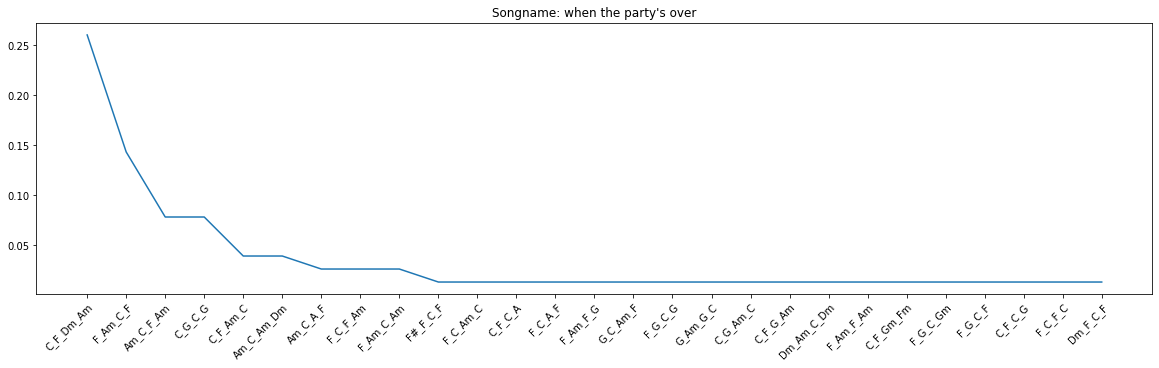

In [ ]:
fig, axe = plt.subplots(figsize=(20,5))
# plt.yscale('log')
plt.title('Songname: '+datas[index]['Songname'])
plt.plot([chord for chord, chordnum in _data], [chordnum for chord, chordnum in _data])
plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
plt.show()

## 전체 통계

In [ ]:
outdict = defaultdict(int)
for data in datas:
  dias = diamondsearch(data['New_chord'])
  for dia, num in dias:
    outdict[dia] += num
_data = sorted(outdict.items(), key=lambda x:x[1], reverse=True)

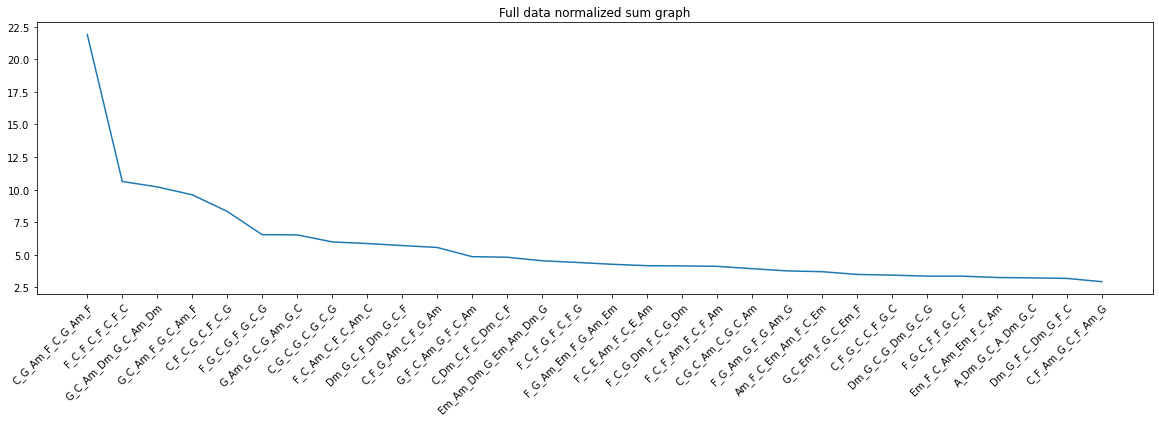

In [ ]:
fig, axe = plt.subplots(figsize=(20,5))
# plt.yscale('log')
plt.title('Full data normalized sum graph')
plt.plot([chord for chord, chordnum in _data][:30], [chordnum for chord, chordnum in _data][:30])
plt.setp(axe.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
plt.show()

피클
 변환

In [ ]:
def diamondsearch_full(song_chords):
  normalizer = len(song_chords)-3
  out = defaultdict(int) # chord, chordnum
  temp = []
  chord1 = song_chords[:-3]
  chord2 = song_chords[1:-2]
  chord3 = song_chords[2:-1]
  chord4 = song_chords[3:]
  for c1, c2, c3, c4 in zip(chord1, chord2, chord3, chord4):
    temp.append('_'.join([c1,c2,c3,c4]))
  C_temp = Counter(temp)
  for chordset, chordnum in C_temp.items():
    for dia, dianum in diamonds:
      if dia.find(chordset) != -1:
        out[dia] += chordnum / normalizer
        out[dia] = round(out[dia], 3)
        break
  return out.items()

In [ ]:
diaout = defaultdict(list)
for data in tqdm(datas):
  dias = diamondsearch_full(data['New_chord'])
  title = data['Songname']
  for dia, num in dias:
    diaout[title].append([dia,num])

100%|██████████| 977/977 [00:20<00:00, 48.14it/s]


In [ ]:
with open('./chord_dia_11_14.pkl', 'wb') as f:
  pickle.dump(diaout, f)

In [ ]:
with open('./diamonds.pkl', 'wb') as f:
  pickle.dump(diamonds, f)

In [ ]:
with open('./diamonts_norm.pkl', 'wb') as f:
  pickle.dump(_data, f)